# Optimizers - Part I 
------------------------------------

This notebook shows the various different optimizers used in machine learning on the beale and rosenbrock functions.

In [125]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from optimizers import * 
from plot_tools import *

from autograd.numpy.linalg import norm
from scipy.spatial import distance

import autograd.numpy as np   # thinly wrapped version of Numpy
from autograd import grad

## Beale Function
---------

The Beale function is a non-convex function:

\begin{equation}
f(x, y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2
\end{equation}

with a global minima at $(x, y) = (3, 0.5)$.

In [2]:
beale_fxn = lambda x, y : (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [3]:
beale_fxn(3.0, 0.5)

0.0

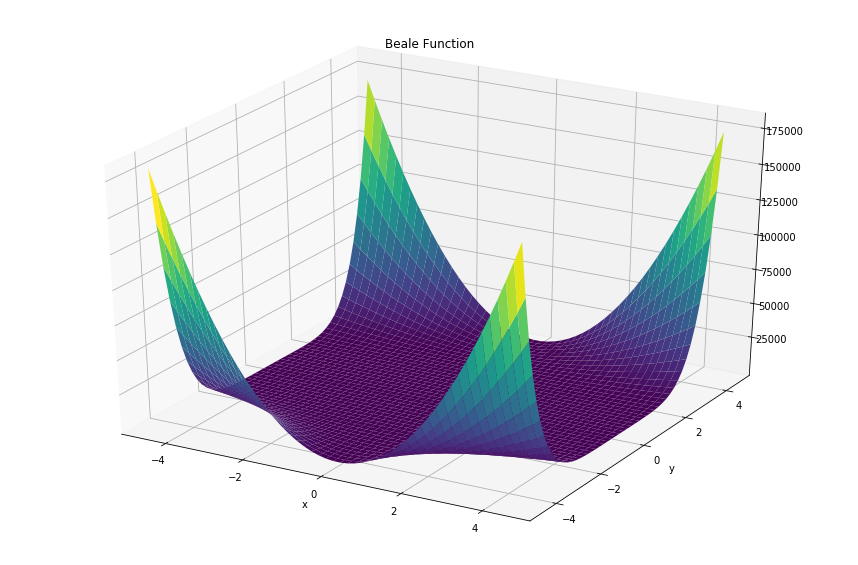

In [4]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
data, minima, x_lims, y_lims = plot_fxn('beale')
ax.plot_surface(*data, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Beale Function')
ax.set_xlabel('x')
ax.set_ylabel('y');

## Testing Optimizers

In [5]:
# y_start, x_start = 1.4, 0.7
x_start, y_start, = 2.8, 3.5 

### 1. SGD

In [6]:
sgd_opt = SGD(beale_fxn)
sgd_opt.run_optimizer(x_start, y_start, print_after=3000, alpha=0.00018, niter=30001) ## 3, 3.5 

iteration: 0  x: 0.848547 y: -1.187358 dx: 10841.40625 dy: 26040.875
iteration: 3000  x: 1.999198 y: 0.104284 dx: -1.273589 dy: -0.8539
iteration: 6000  x: 2.412128 y: 0.310289 dx: -0.453907 dy: -0.182724
iteration: 9000  x: 2.589382 y: 0.377184 dx: -0.239798 dy: -0.084565
iteration: 12000  x: 2.692331 y: 0.412042 dx: -0.152067 dy: -0.049379
iteration: 15000  x: 2.760796 y: 0.433655 dx: -0.105771 dy: -0.032445
iteration: 18000  x: 2.809765 y: 0.448369 dx: -0.077695 dy: -0.022864
iteration: 21000  x: 2.84639 y: 0.45898 dx: -0.059133 dy: -0.016864
iteration: 24000  x: 2.874615 y: 0.466933 dx: -0.046125 dy: -0.012838
iteration: 27000  x: 2.89683 y: 0.473057 dx: -0.036625 dy: -0.01
iteration: 30000  x: 2.914588 y: 0.477868 dx: -0.029473 dy: -0.007924


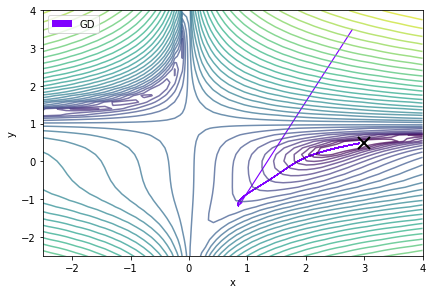

In [7]:
plot_contour(sgd_opt.saved_vals, fxn_name='beale', animate_gif=False, fig_size='small')

### 2. SGD with Momentum

In [8]:
# test2 = SGD(beale_fxn, 'beale')
# x1, y1 = test2.run_optimizer(x_start, y_start)
sgdmom_opt = SGD_momentum(beale_fxn)
sgdmom_opt.run_optimizer(x_start, y_start, alpha=0.0001, niter=38001, print_after=3000)

iteration: 0  x: 1.715859 y: 0.895913 dx: 10841.40625 dy: 26040.875
iteration: 3000  x: 1.860153 y: -0.002091 dx: -1.580485 dy: -1.361635
iteration: 6000  x: 2.394628 y: 0.303201 dx: -0.480031 dy: -0.19568
iteration: 9000  x: 2.594756 y: 0.379075 dx: -0.234624 dy: -0.08239
iteration: 12000  x: 2.704541 y: 0.415987 dx: -0.143163 dy: -0.046022
iteration: 15000  x: 2.775269 y: 0.438068 dx: -0.097064 dy: -0.029412
iteration: 18000  x: 2.824717 y: 0.452741 dx: -0.069879 dy: -0.020302
iteration: 21000  x: 2.861011 y: 0.463124 dx: -0.05226 dy: -0.014717
iteration: 24000  x: 2.888513 y: 0.470778 dx: -0.040108 dy: -0.01103
iteration: 27000  x: 2.909818 y: 0.476583 dx: -0.031357 dy: -0.008466
iteration: 30000  x: 2.926589 y: 0.481078 dx: -0.024852 dy: -0.006613
iteration: 33000  x: 2.939951 y: 0.484613 dx: -0.019902 dy: -0.005234
iteration: 36000  x: 2.950694 y: 0.487425 dx: -0.016065 dy: -0.004186


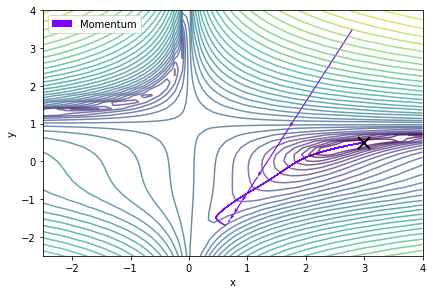

In [9]:
plot_contour(sgdmom_opt.saved_vals, fxn_name='beale', animate_gif=False, fig_size='small')

### 3. Nesterov

In [10]:
nest_opt = Nesterov(beale_fxn)
nest_opt.run_optimizer(x_start, y_start, alpha=0.00005, niter=38001, print_after=3000)

iteration: 0  x: 1.986895 y: 1.546934 dx: 10841.40625 dy: 26040.875
iteration: 3000  x: 1.826172 y: -0.03212 dx: -1.654474 dy: -1.497708
iteration: 6000  x: 2.384414 y: 0.299021 dx: -0.495709 dy: -0.203565
iteration: 9000  x: 2.589802 y: 0.377332 dx: -0.239397 dy: -0.084391
iteration: 12000  x: 2.70153 y: 0.415018 dx: -0.145332 dy: -0.046835
iteration: 15000  x: 2.773233 y: 0.43745 dx: -0.098268 dy: -0.029828
iteration: 18000  x: 2.823253 y: 0.452316 dx: -0.070629 dy: -0.020546
iteration: 21000  x: 2.859918 y: 0.462816 dx: -0.052763 dy: -0.014873
iteration: 24000  x: 2.887675 y: 0.470547 dx: -0.040464 dy: -0.011136
iteration: 27000  x: 2.909163 y: 0.476406 dx: -0.031618 dy: -0.008541
iteration: 30000  x: 2.926071 y: 0.48094 dx: -0.025049 dy: -0.006668
iteration: 33000  x: 2.939536 y: 0.484504 dx: -0.020053 dy: -0.005276
iteration: 36000  x: 2.950359 y: 0.487338 dx: -0.016183 dy: -0.004218


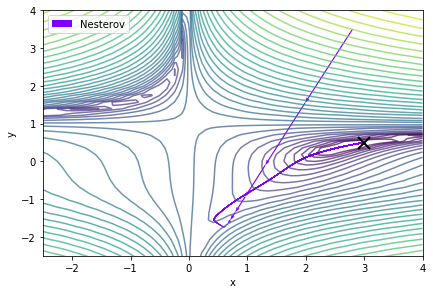

In [11]:
plot_contour(nest_opt.saved_vals, fxn_name='beale', animate_gif=False, fig_size='small')

### 4. Adam

In [12]:
adam_opt = Adam(beale_fxn)
adam_opt.run_optimizer(x_start, y_start, niter = 10000, alpha=0.1)  #3, 3.5
# test5.run_optimizer(x_start, y_start, niter = 10000, alpha=0.00001)

iteration: 0  x: 2.7 y: 3.4 dx: 10841.40625 dy: 26040.875
iteration: 1000  x: 0.273765 y: 0.883081 dx: -2.876579 dy: 6.167498
iteration: 2000  x: 1.840293 y: 0.181852 dx: -2.489194 dy: 0.906895
iteration: 3000  x: 2.370753 y: 0.279482 dx: -0.417826 dy: -0.476844
iteration: 4000  x: 2.633992 y: 0.389743 dx: -0.172874 dy: -0.147101
iteration: 5000  x: 2.812776 y: 0.448511 dx: -0.068536 dy: -0.048731
iteration: 6000  x: 2.924243 y: 0.480255 dx: -0.0236 dy: -0.015092
iteration: 7000  x: 2.980035 y: 0.494931 dx: -0.00574 dy: -0.003486
iteration: 8000  x: 2.997584 y: 0.499391 dx: -0.000678 dy: -0.000405
Adam reached minimum at iteration: 8693


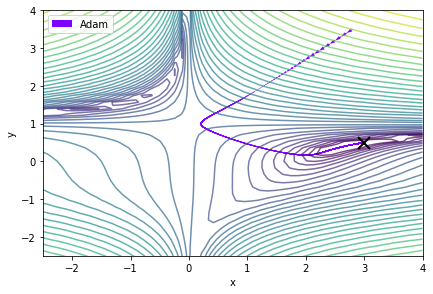

In [13]:
plot_contour(adam_opt.saved_vals, fxn_name='beale', animate_gif=False, fig_size='small')

### 5. AdaMax

In [14]:
admax_opt = AdaMax(beale_fxn)
admax_opt.run_optimizer(x_start, y_start, niter = 10000, alpha = 0.0006)

iteration: 0  x: 2.7994 y: 3.4994 dx: 10841.40625 dy: 26040.875
iteration: 1000  x: 2.251922 y: 2.962385 dx: 3279.822497 dy: 7549.017399
iteration: 2000  x: 1.788359 y: 2.529369 dx: 1046.76077 dy: 2277.308977
iteration: 3000  x: 1.378929 y: 2.171286 dx: 346.212145 dy: 696.885059
iteration: 4000  x: 1.003451 y: 1.872444 dx: 119.514671 dy: 214.114682
iteration: 5000  x: 0.639733 y: 1.624463 dx: 44.302762 dy: 64.10878
iteration: 6000  x: 0.248698 y: 1.438919 dx: 19.15258 dy: 14.063762
iteration: 7000  x: -0.286688 y: 1.458454 dx: 14.099754 dy: -11.38759
iteration: 8000  x: -0.699456 y: 1.753532 dx: 0.856582 dy: 0.485647
iteration: 9000  x: -0.811022 y: 1.685425 dx: 0.696142 dy: 0.506553


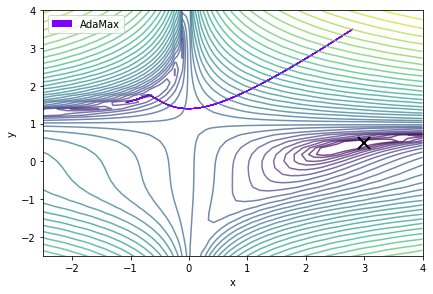

In [15]:
plot_contour(admax_opt.saved_vals, fxn_name='beale', animate_gif=False, fig_size='small')

### 6. AdaGrad

In [16]:
agrad_opt = AdaGrad(beale_fxn)
agrad_opt.run_optimizer(x_start, y_start, niter = 10000)

iteration: 0  x: 2.79 y: 3.49 dx: 10841.40625 dy: 26040.875
iteration: 1000  x: 2.298778 y: 3.002552 dx: 3618.963453 dy: 8381.125753
iteration: 2000  x: 2.140445 y: 2.847615 dx: 2474.362747 dy: 5648.588196
iteration: 3000  x: 2.034764 y: 2.745052 dx: 1901.539112 dy: 4295.222837
iteration: 4000  x: 1.954569 y: 2.667757 dx: 1549.005783 dy: 3468.834056
iteration: 5000  x: 1.889741 y: 2.605648 dx: 1308.01846 dy: 2907.572101
iteration: 6000  x: 1.835277 y: 2.553751 dx: 1132.15468 dy: 2500.263211
iteration: 7000  x: 1.788303 y: 2.509213 dx: 997.887253 dy: 2190.825725
iteration: 8000  x: 1.747009 y: 2.47024 dx: 891.907181 dy: 1947.665187
iteration: 9000  x: 1.710173 y: 2.435625 dx: 806.079723 dy: 1751.541762


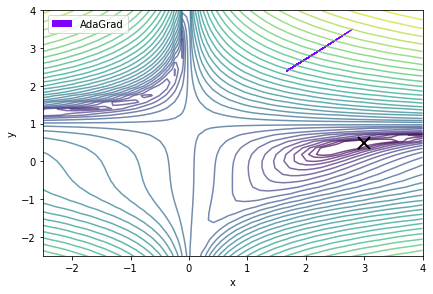

In [17]:
plot_contour(agrad_opt.saved_vals, fxn_name='beale', animate_gif=False, fig_size='small')

### 7. AdaDelta

In [18]:
adelta_opt = AdaDelta(beale_fxn)
adelta_opt.run_optimizer(x_start, y_start, niter = 14000)

iteration: 0  x: 2.799553 y: 3.499553 dx: 10841.40625 dy: 26040.875
iteration: 1400  x: 2.123152 y: 2.830966 dx: 2374.278619 dy: 5410.840208
iteration: 2800  x: 1.485589 y: 2.206137 dx: 403.159203 dy: 857.240737
iteration: 4200  x: 0.896663 y: 1.627136 dx: 51.940893 dy: 105.254015
iteration: 5600  x: 0.389503 y: 1.067219 dx: 2.026349 dy: 12.247248
iteration: 7000  x: 2.472599 y: 0.352847 dx: -0.521337 dy: 0.290146
iteration: 8400  x: 2.881756 y: 0.43089 dx: -0.390623 dy: 1.370063
iteration: 9800  x: 2.888072 y: 0.426861 dx: -0.431644 dy: 1.569712
iteration: 11200  x: 2.887767 y: 0.42666 dx: -0.432717 dy: 1.572846
iteration: 12600  x: 2.88749 y: 0.426475 dx: -0.433707 dy: 1.575753


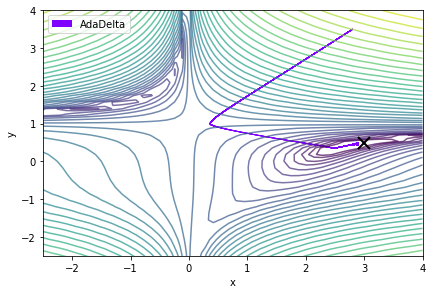

In [19]:
plot_contour(adelta_opt.saved_vals, fxn_name='beale', animate_gif=False, fig_size='small')

### 8. NAdam

In [20]:
nadam_opt = Nadam(beale_fxn)
nadam_opt.run_optimizer(x_start, y_start, alpha=0.1, niter = 10000)

iteration: 0  x: 2.61 y: 3.31 dx: 10841.40625 dy: 26040.875
iteration: 1000  x: 0.212307 y: 0.901292 dx: -2.485131 dy: 4.967517
iteration: 2000  x: 1.923236 y: 0.170025 dx: -2.004112 dy: 0.373192
iteration: 3000  x: 2.421344 y: 0.303365 dx: -0.360959 dy: -0.391111
iteration: 4000  x: 2.679576 y: 0.405759 dx: -0.142025 dy: -0.11507
iteration: 5000  x: 2.846595 y: 0.458504 dx: -0.05349 dy: -0.036752
iteration: 6000  x: 2.944281 y: 0.485615 dx: -0.016867 dy: -0.010569
iteration: 7000  x: 2.987847 y: 0.496925 dx: -0.003457 dy: -0.00208
iteration: 8000  x: 2.998947 y: 0.499735 dx: -0.000295 dy: -0.000176
NAdam reached minimum at iteration: 8404


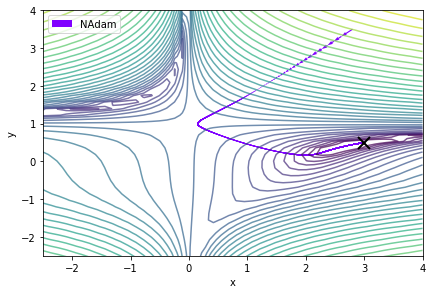

In [21]:
plot_contour(nadam_opt.saved_vals, fxn_name='beale', animate_gif=False, fig_size='small')

### 8. RMSprop

In [22]:
rms_opt = RMSprop(beale_fxn)
rms_opt.run_optimizer(x_start, y_start, niter = 10000)

iteration: 0  x: 2.799 y: 3.499 dx: 10841.40625 dy: 26040.875
iteration: 1000  x: 1.799 y: 2.499 dx: 982.2375 dy: 2179.845
iteration: 2000  x: 0.799 y: 1.499 dx: 31.51875 dy: 67.51
iteration: 3000  x: 0.8 y: 0.499 dx: -6.946906 dy: 6.704659
iteration: 4000  x: 1.8 y: 0.099862 dx: -2.363542 dy: -0.015209
iteration: 5000  x: 2.8 y: 0.44664 dx: -0.088122 dy: -0.009035
iteration: 6000  x: 2.966543 y: 0.491682 dx: 0.002078 dy: -0.051074
iteration: 7000  x: 2.967068 y: 0.491821 dx: 0.00221 dy: -0.050882
iteration: 8000  x: 2.967538 y: 0.491945 dx: 0.002322 dy: -0.050688
iteration: 9000  x: 2.967964 y: 0.492059 dx: 0.002424 dy: -0.05051


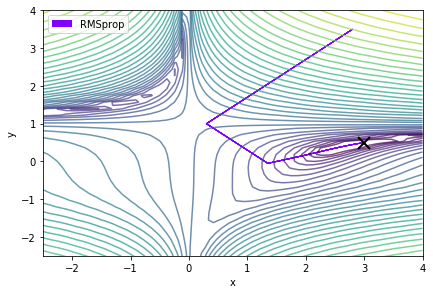

In [23]:
plot_contour(rms_opt.saved_vals, fxn_name='beale', animate_gif=False, fig_size='small')

### 9. RAdam

In [24]:
radam_opt = RAdam(beale_fxn)
radam_opt.run_optimizer(x_start, y_start, niter = 10000, alpha=0.0002, cc=False)

iteration: 0  x: 0.631719 y: -1.708175 dx: 10841.40625 dy: 26040.875
iteration: 1000  x: -2.454792 y: 0.01745 dx: -27.252132 dy: -20.034848
iteration: 2000  x: -2.452964 y: 0.018937 dx: -27.221738 dy: -20.065512
iteration: 3000  x: -2.449156 y: 0.022049 dx: -27.158135 dy: -20.130635
iteration: 4000  x: -2.442271 y: 0.02772 dx: -27.042297 dy: -20.252549
iteration: 5000  x: -2.430525 y: 0.037537 dx: -26.84188 dy: -20.473438
iteration: 6000  x: -2.411064 y: 0.054231 dx: -26.501363 dy: -20.876944
iteration: 7000  x: -2.379546 y: 0.082553 dx: -25.923427 dy: -21.638944
iteration: 8000  x: -2.330021 y: 0.130922 dx: -24.930144 dy: -23.150313
iteration: 9000  x: -2.256324 y: 0.214029 dx: -23.173611 dy: -26.285817


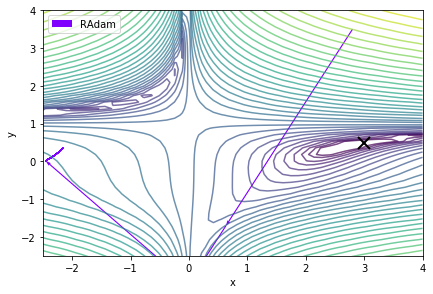

In [25]:
plot_contour(radam_opt.saved_vals, fxn_name='beale', animate_gif=False, fig_size='small')

### Plotting all optimizers

**Contour plot** 

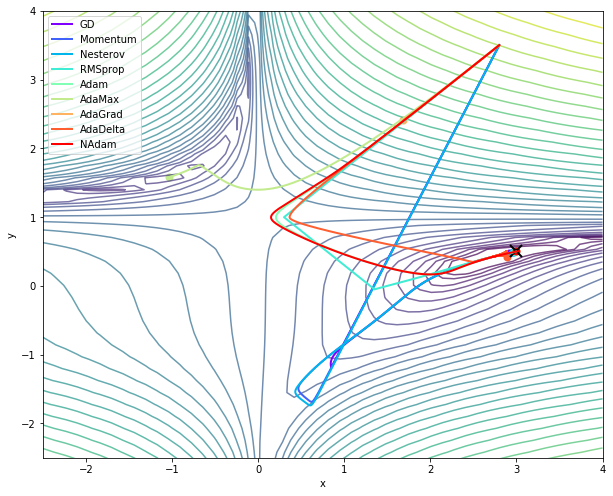

In [26]:
plot_contour(sgd_opt.saved_vals, sgdmom_opt.saved_vals, nest_opt.saved_vals, rms_opt.saved_vals, 
             adam_opt.saved_vals, admax_opt.saved_vals, agrad_opt.saved_vals, adelta_opt.saved_vals, 
             nadam_opt.saved_vals, fxn_name='beale', f_name='all')

**3D plot**

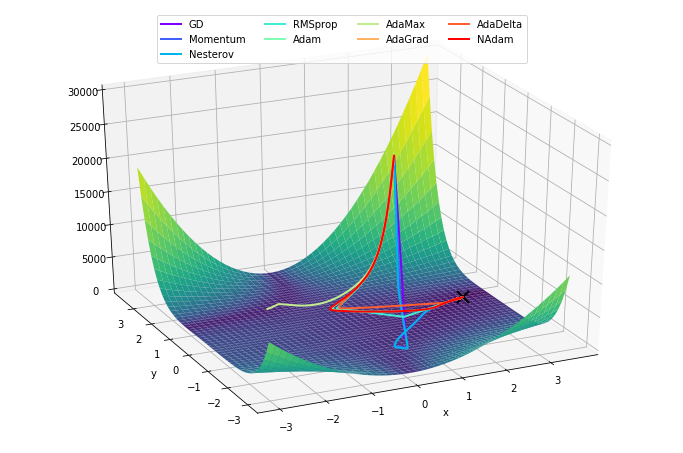

In [27]:
plot_3D(sgd_opt.saved_vals, sgdmom_opt.saved_vals, nest_opt.saved_vals, rms_opt.saved_vals, 
        adam_opt.saved_vals, admax_opt.saved_vals, agrad_opt.saved_vals, adelta_opt.saved_vals, 
        nadam_opt.saved_vals,fxn_name='beale', f_name='all')

## Rosenbrock function
------------------------

The Rosenbrock function is a non-convex function defined by:

\begin{equation}
f(x, y) = (a - x)^2 + b(y - x^2)^2
\end{equation}
with a global minima at $(x,y) = (a, a^2)$. The parameters a and b are usually set to $a = 1, b = 100$.

In [28]:
a, b = 1, 100

In [29]:
rosenbrock_fxn = lambda x, y : (a - x)**2 + b*(y - x**2)**2

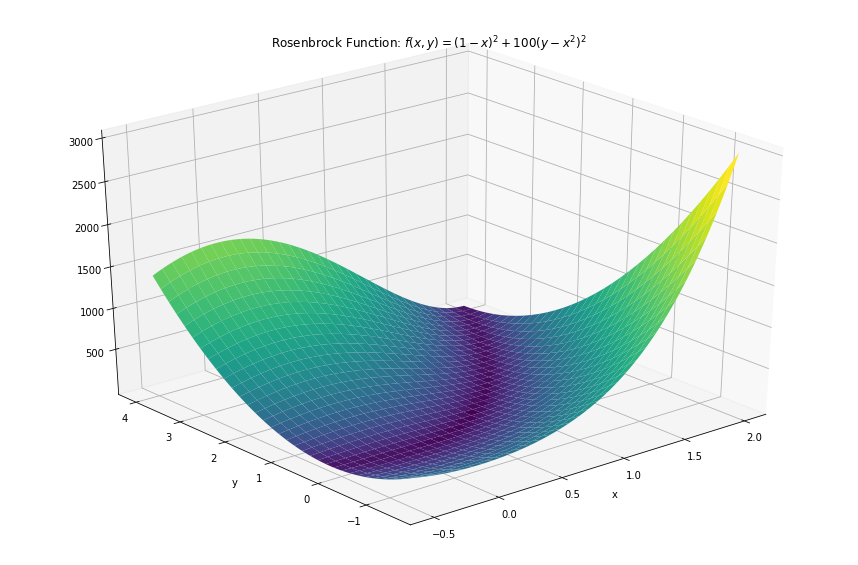

In [30]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
data, minima, x_lims, y_lims = plot_fxn('rosenbrock')
ax.plot_surface(*data, rstride=3, cstride=3, norm=colors.PowerNorm(gamma=0.4),
                cmap='viridis', edgecolor='none')
ax.view_init(azim=230)
ax.set_title('Rosenbrock Function: $f(x,y) = (1-x)^2+100(y-x^2)^2$')
ax.set_xlabel('x')
ax.set_ylabel('y');

In [234]:
x_start, y_start = 0.0,3.0
rosenbrock_fxn(x_start, y_start)

901.0

In [235]:
sgd_ropt = SGD(rosenbrock_fxn)
sgd_ropt.run_optimizer(x_start, y_start, niter = 6001, print_after=1000, alpha=0.0019)

iteration: 0  x: 0.0038 y: 1.86 dx: -2.0 dy: 600.0
iteration: 1000  x: 0.817743 y: 0.667891 dx: -0.099104 dy: -0.16255
iteration: 2000  x: 0.927621 y: 0.860179 dx: -0.03256 dy: -0.060547
iteration: 3000  x: 0.968193 y: 0.937268 dx: -0.013382 dy: -0.025968
iteration: 4000  x: 0.985513 y: 0.971177 dx: -0.005926 dy: -0.011705
iteration: 5000  x: 0.993302 y: 0.986622 dx: -0.002706 dy: -0.005386
iteration: 6000  x: 0.996883 y: 0.993762 dx: -0.001252 dy: -0.002502


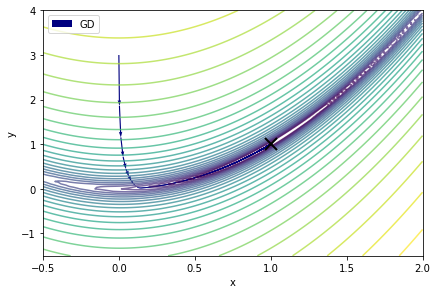

In [236]:
plot_contour(sgd_ropt.saved_vals, fxn_name='rosenbrock', animate_gif=False, fig_size='small')

### 2. SGD with Momentum

In [34]:
sgdmom_ropt = SGD_momentum(rosenbrock_fxn)
sgdmom_ropt.run_optimizer(x_start, y_start, alpha=0.001, niter=10000, print_after=3000)

iteration: 0  x: 0.002 y: 2.4 dx: -2.0 dy: 600.0
iteration: 3000  x: 0.971433 y: 0.943565 dx: -0.011956 dy: -0.023279
iteration: 6000  x: 0.997511 y: 0.995019 dx: -0.000999 dy: -0.001996
Momentum reached minimum at iteration: 7728


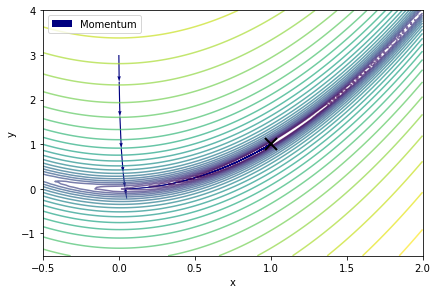

In [35]:
plot_contour(sgdmom_ropt.saved_vals, fxn_name='rosenbrock', animate_gif=False, fig_size='small')

### 3. Nesterov

In [36]:
nest_ropt = Nesterov(rosenbrock_fxn)
nest_ropt.run_optimizer(x_start, y_start, alpha=0.001, niter=10000, print_after=1000)

iteration: 0  x: 0.003 y: 2.1 dx: -2.0 dy: 600.0
iteration: 1000  x: 0.931572 y: 0.867541 dx: -0.030608 dy: -0.057166
iteration: 2000  x: 0.987369 y: 0.974846 dx: -0.005156 dy: -0.010203
iteration: 3000  x: 0.997496 y: 0.994987 dx: -0.001006 dy: -0.002011
iteration: 4000  x: 0.999497 y: 0.998992 dx: -0.000201 dy: -0.000403
Nesterov reached minimum at iteration: 4300


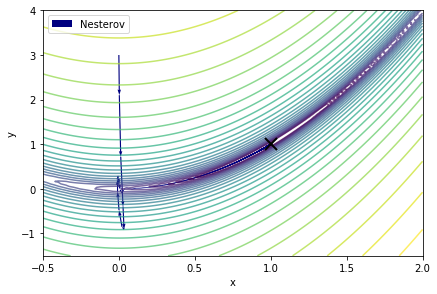

In [37]:
plot_contour(nest_ropt.saved_vals, fxn_name='rosenbrock', animate_gif=False, fig_size='small')

### 4. Adam

In [237]:
adam_ropt = Adam(rosenbrock_fxn)
adam_ropt.run_optimizer(x_start, y_start, niter = 10000, alpha=0.1)

iteration: 0  x: 0.1 y: 2.9 dx: -2.0 dy: 600.0
iteration: 1000  x: 1.075331 y: 1.156612 dx: 0.031815 dy: 0.055318
iteration: 2000  x: 1.020005 y: 1.040486 dx: 0.009181 dy: 0.015148
iteration: 3000  x: 1.001584 y: 1.003177 dx: 0.000749 dy: 0.001213
Adam reached minimum at iteration: 3678


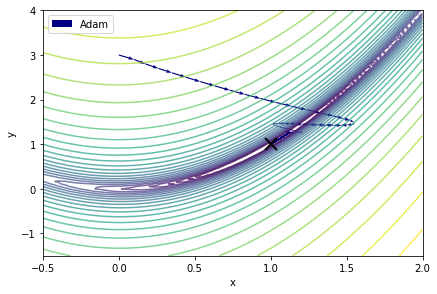

In [238]:
plot_contour(adam_ropt.saved_vals, fxn_name='rosenbrock', animate_gif=False, fig_size='small')

iteration: 0  x: 0.004989 y: 2.683887 dx: -2.0 dy: 600.0
Adam reached minimum at iteration: 3053
iteration: 0  x: 0.000274 y: 2.970973 dx: -2.0 dy: 600.0
Adam reached minimum at iteration: 8087
iteration: 0  x: 0.000256 y: 2.996845 dx: -2.0 dy: 600.0


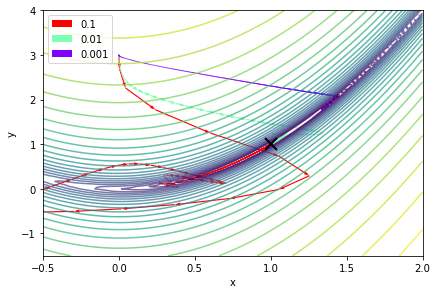

In [1667]:
lr_tester([0.1, 0.01, 0.001], 'rosenbrock', adam_ropt, x_start, y_start)

### 5. AdaMax

In [40]:
admax_ropt = AdaMax(rosenbrock_fxn)
admax_ropt.run_optimizer(x_start, y_start, niter = 7001, alpha = 0.01, print_after=1000)

iteration: 0  x: 0.01 y: 2.99 dx: -2.0 dy: 600.0
iteration: 1000  x: 1.371382 y: 1.881898 dx: 0.078823 dy: 0.242072
iteration: 2000  x: 1.364541 y: 1.863164 dx: 0.078069 dy: 0.238553
iteration: 3000  x: 1.34627 y: 1.813588 dx: 0.075968 dy: 0.229009
iteration: 4000  x: 1.299161 y: 1.688835 dx: 0.069934 dy: 0.203401
iteration: 5000  x: 1.191659 y: 1.420745 dx: 0.052141 dy: 0.139061
iteration: 6000  x: 1.042433 y: 1.086836 dx: 0.014502 dy: 0.033854
iteration: 7000  x: 1.000312 y: 1.000625 dx: 0.000115 dy: 0.000257


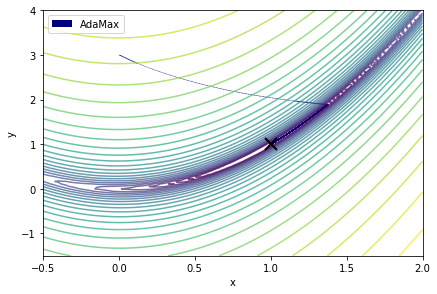

In [41]:
plot_contour(admax_ropt.saved_vals, fxn_name='rosenbrock', animate_gif=False, fig_size='small')

### 6. AdaGrad

In [42]:
agrad_ropt = AdaGrad(rosenbrock_fxn)
agrad_ropt.run_optimizer(x_start, y_start, niter = 6001, alpha=0.1)

iteration: 0  x: 0.1 y: 2.9 dx: -2.0 dy: 600.0


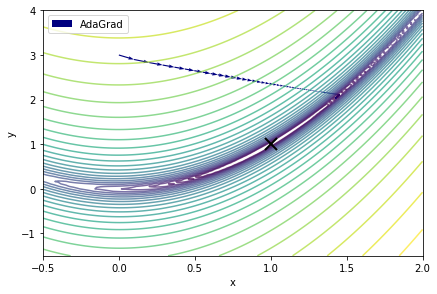

In [43]:
plot_contour(agrad_ropt.saved_vals, fxn_name='rosenbrock', animate_gif=False, fig_size='small')

### 7. AdaDelta

In [44]:
adelta_ropt = AdaDelta(rosenbrock_fxn)
adelta_ropt.run_optimizer(x_start, y_start, niter = 10000)

iteration: 0  x: 0.000447 y: 2.999553 dx: -2.0 dy: 600.0
AdaDelta reached minimum at iteration: 157


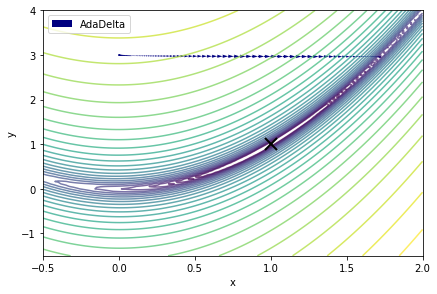

In [45]:
plot_contour(adelta_ropt.saved_vals, fxn_name='rosenbrock', animate_gif=False, fig_size='small')

### 8. NAdam

In [46]:
nadam_ropt = Nadam(rosenbrock_fxn)
nadam_ropt.run_optimizer(x_start, y_start, niter = 10000, alpha=0.02)

iteration: 0  x: 0.038 y: 2.962 dx: -2.0 dy: 600.0
iteration: 1000  x: 1.389014 y: 1.930596 dx: 0.090799 dy: 0.247393
iteration: 2000  x: 1.354875 y: 1.836835 dx: 0.08655 dy: 0.23001
iteration: 3000  x: 1.297899 y: 1.685539 dx: 0.078325 dy: 0.199394
iteration: 4000  x: 1.214844 y: 1.4766 dx: 0.063308 dy: 0.15086
iteration: 5000  x: 1.115241 y: 1.244191 dx: 0.039223 dy: 0.085828
iteration: 6000  x: 1.035091 y: 1.07155 dx: 0.0135 dy: 0.027433
iteration: 7000  x: 1.004081 y: 1.008195 dx: 0.00165 dy: 0.003254
NAdam reached minimum at iteration: 7996


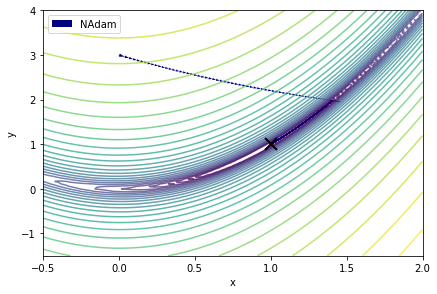

In [47]:
plot_contour(nadam_ropt.saved_vals, fxn_name='rosenbrock', animate_gif=False, fig_size='small')

### 8. RMSprop

In [48]:
rms_ropt = RMSprop(rosenbrock_fxn)
rms_ropt.run_optimizer(x_start, y_start, niter = 6001)

iteration: 0  x: 0.001 y: 2.999 dx: -2.0 dy: 600.0


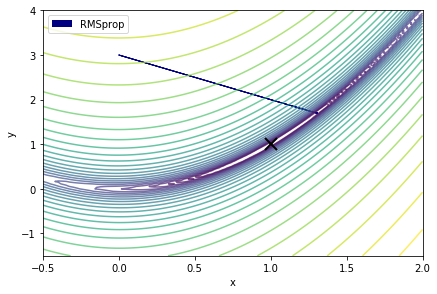

In [49]:
plot_contour(rms_ropt.saved_vals, fxn_name='rosenbrock', animate_gif=False, fig_size='small')

### 9. RAdam

In [50]:
radam_ropt = RAdam(rosenbrock_fxn)
radam_ropt.run_optimizer(x_start, y_start, niter = 10000,alpha=0.01)

iteration: 0  x: 0.02 y: -3.0 dx: -2.0 dy: 600.0
iteration: 1000  x: 1.293664 y: 1.67448 dx: 0.114795 dy: 0.182636
iteration: 2000  x: 1.285797 y: 1.654167 dx: 0.112825 dy: 0.178406
iteration: 3000  x: 1.26981 y: 1.613266 dx: 0.108675 dy: 0.169703
iteration: 4000  x: 1.242336 y: 1.544171 dx: 0.101071 dy: 0.154411
iteration: 5000  x: 1.19976 y: 1.440073 dx: 0.088014 dy: 0.129857
iteration: 6000  x: 1.141142 y: 1.302675 dx: 0.067189 dy: 0.094297
iteration: 7000  x: 1.075133 y: 1.15617 dx: 0.039123 dy: 0.051744
iteration: 8000  x: 1.024068 y: 1.0488 dx: 0.013461 dy: 0.016965
iteration: 9000  x: 1.00329 y: 1.006602 dx: 0.001896 dy: 0.002342
RAdam reached minimum at iteration: 9995


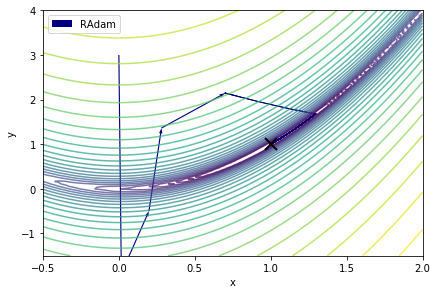

In [51]:
plot_contour(radam_ropt.saved_vals, fxn_name='rosenbrock', animate_gif=False, fig_size='small')

### Plotting all optimizers

**Contour plot** 

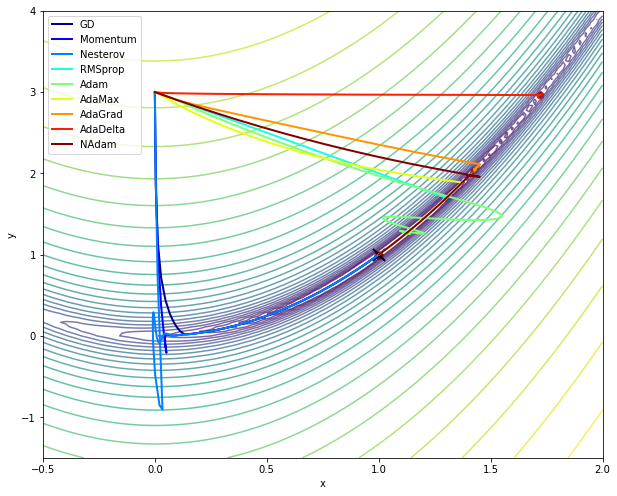

In [52]:
plot_contour(sgd_ropt.saved_vals, sgdmom_ropt.saved_vals, nest_ropt.saved_vals, rms_ropt.saved_vals, 
             adam_ropt.saved_vals, admax_ropt.saved_vals, agrad_ropt.saved_vals, adelta_ropt.saved_vals, 
             nadam_ropt.saved_vals, fxn_name='rosenbrock', f_name='all')

**3D plot**

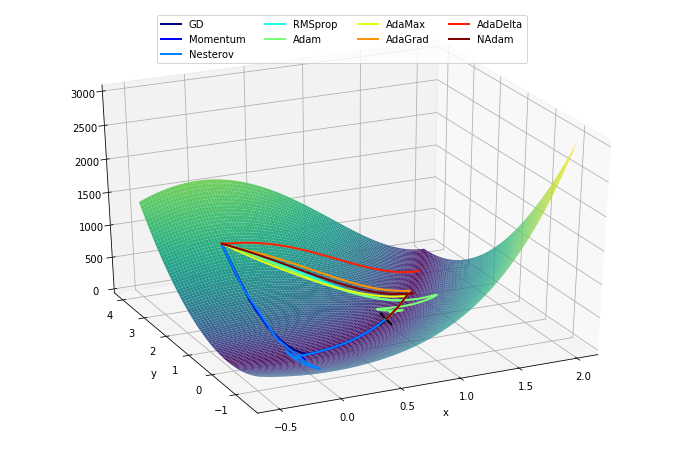

In [239]:
plot_3D(sgd_ropt.saved_vals, sgdmom_ropt.saved_vals, nest_ropt.saved_vals, rms_ropt.saved_vals, 
             adam_ropt.saved_vals, admax_ropt.saved_vals, agrad_ropt.saved_vals, adelta_ropt.saved_vals, 
             nadam_ropt.saved_vals, fxn_name='rosenbrock', f_name='all_5')

## Saddle
------------------------

The Saddle function is defined by:

\begin{equation}
f(x, y) = x^2−y^2
\end{equation}

In [67]:
saddle_fxn = lambda x, y : (x)**2 - (y)**2

In [109]:
saddle_fxn(0, 0)

0

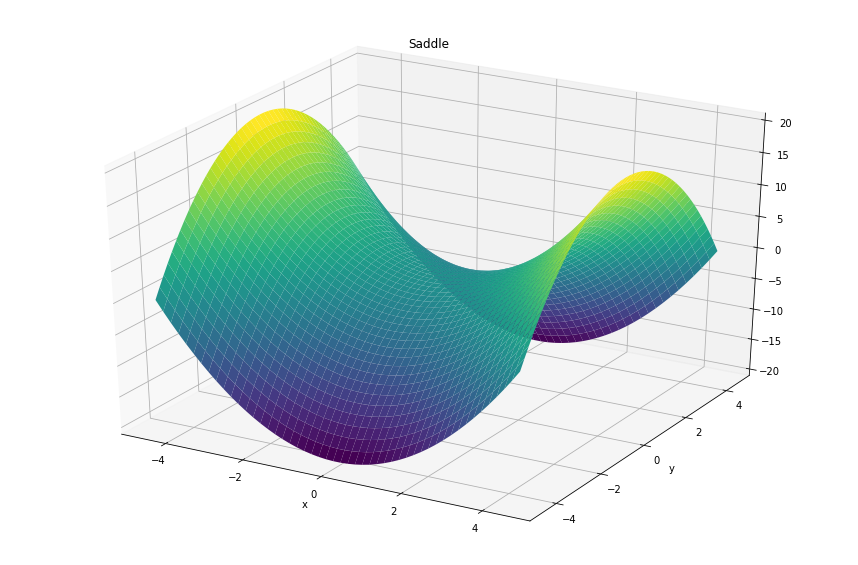

In [147]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
data, minima, x_lims, y_lims = plot_fxn('saddle')
ax.plot_surface(*data, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
# ax.view_init(azim=-60)
# ax.plot([-3.0],[0.0],[saddle_fxn(-3,0)], 'r*', markersize=12, color='k')
ax.set_title('Saddle')
ax.set_xlabel('x')
ax.set_ylabel('y');

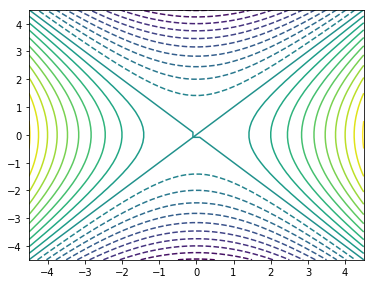

In [160]:
fig, ax = plt.subplots(figsize=(6, 4.6))
cntr = ax.contour(*data, 20, cmap='viridis') #cmap=plt.cm.jet) 
cntr.monochrome = True
for col, ls in zip(cntr.collections, cntr._process_linestyles()):
    col.set_linestyle(ls)
plt.show()

In [249]:
x_start, y_start = -3.0, -0.01
saddle_fxn(x_start, y_start)

8.9999

In [266]:
sgd_sopt = SGD(saddle_fxn)
sgd_sopt.run_optimizer(x_start, y_start, niter = 501, print_after=100, alpha=0.01)

iteration: 0  x: -2.94 y: -0.0102 dx: -6.0 dy: 0.02
iteration: 100  x: -0.389901 y: -0.073895 dx: -0.795717 dy: 0.144893
iteration: 200  x: -0.051709 y: -0.535346 dx: -0.105528 dy: 1.049698
iteration: 300  x: -0.006858 y: -3.878392 dx: -0.013995 dy: 7.60469
iteration: 400  x: -0.000909 y: -28.097577 dx: -0.001856 dy: 55.093289
iteration: 500  x: -0.000121 y: -203.557005 dx: -0.000246 dy: 399.131383


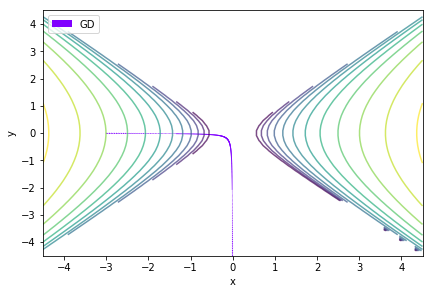

In [267]:
plot_contour(sgd_sopt.saved_vals, fxn_name='saddle', animate_gif=False, fig_size='small')

In [268]:
sgdmom_sopt = SGD_momentum(saddle_fxn)
sgdmom_sopt.run_optimizer(x_start, y_start, niter = 501, print_after=100, alpha=0.01, cc=False)

iteration: 0  x: -2.94 y: -0.0102 dx: -6.0 dy: 0.02
iteration: 100  x: -0.042093 y: -0.441772 dx: -0.087861 dy: 0.850733
iteration: 200  x: -0.000587 y: -19.439369 dx: -0.001225 dy: 37.434955
iteration: 300  x: -8e-06 y: -855.393738 dx: -1.7e-05 dy: 1647.256474
iteration: 400  x: -0.0 y: -37640.031278 dx: -0.0 dy: 72484.497453
iteration: 500  x: -0.0 y: -1656280.484667 dx: -0.0 dy: 3189547.258478


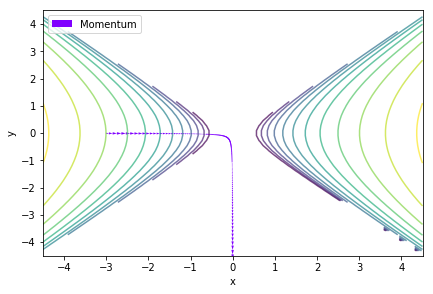

In [269]:
plot_contour(sgdmom_sopt.saved_vals, fxn_name='saddle', animate_gif=False, fig_size='small')

### 3. Nesterov

In [271]:
nest_sopt = Nesterov(saddle_fxn)
nest_sopt.run_optimizer(x_start, y_start, alpha=0.01, niter=501, print_after=100)

iteration: 0  x: -2.91 y: -0.0103 dx: -6.0 dy: 0.02
iteration: 100  x: -0.000227 y: -12.097407 dx: -0.000499 dy: 22.536459
iteration: 200  x: -0.0 y: -14667.473816 dx: -0.0 dy: 27324.27749
iteration: 300  x: -0.0 y: -17783544.87381 dx: -0.0 dy: 33129257.360412
iteration: 400  x: -0.0 y: -21561618056.31478 dx: -0.0 dy: 40167491845.03306
iteration: 500  x: -0.0 y: -26142334191821.53 dx: -0.0 dy: 48700983048560.42


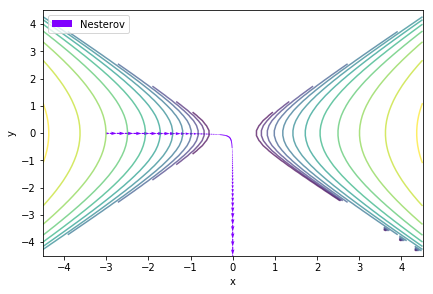

In [272]:
plot_contour(nest_sopt.saved_vals, fxn_name='saddle', animate_gif=False, fig_size='small')

### 4. Adam

In [274]:
adam_sopt = Adam(saddle_fxn)
adam_sopt.run_optimizer(x_start, y_start, niter = 501, print_after=100, alpha=0.1)  #3, 3.5
# test5.run_optimizer(x_start, y_start, niter = 10000, alpha=0.00001)

iteration: 0  x: -2.9 y: -0.11 dx: -6.0 dy: 0.02
iteration: 100  x: -0.018061 y: -13.903428 dx: -0.038689 dy: 27.482894
iteration: 200  x: 4e-05 y: -30.474799 dx: 0.000106 dy: 60.615462
iteration: 300  x: 0.0 y: -47.145346 dx: 1e-06 dy: 93.958577
iteration: 400  x: -0.0 y: -63.657806 dx: -0.0 dy: 126.987297
iteration: 500  x: -0.0 y: -79.970304 dx: -0.0 dy: 159.616391


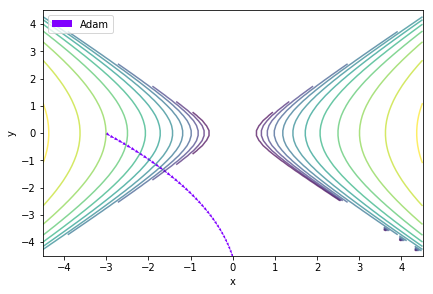

In [275]:
plot_contour(adam_sopt.saved_vals, fxn_name='saddle', animate_gif=False, fig_size='small')

### 5. AdaMax

In [276]:
admax_sopt = AdaMax(saddle_fxn)
admax_sopt.run_optimizer(x_start, y_start, niter = 501, alpha = 0.1, print_after=100)

iteration: 0  x: -2.9 y: -0.11 dx: -6.0 dy: 0.02
iteration: 100  x: 0.012158 y: -7.948048 dx: 0.024612 dy: 15.716388
iteration: 200  x: -8.9e-05 y: -17.252708 dx: -0.000185 dy: 34.315355
iteration: 300  x: 0.0 y: -26.854401 dx: 1e-06 dy: 53.515302
iteration: 400  x: 0.0 y: -36.576158 dx: 0.0 dy: 72.957128
iteration: 500  x: -0.0 y: -46.362631 dx: -0.0 dy: 92.529076


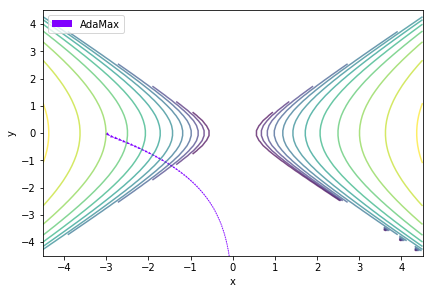

In [277]:
plot_contour(admax_sopt.saved_vals, fxn_name='saddle', animate_gif=False, fig_size='small')

### 6. AdaGrad

In [278]:
agrad_sopt = AdaGrad(saddle_fxn)
agrad_sopt.run_optimizer(x_start, y_start, niter = 501, print_after=100, alpha=0.1)

iteration: 0  x: -2.9 y: -0.109999 dx: -6.0 dy: 0.02
iteration: 100  x: -1.387906 y: -2.741552 dx: -2.789936 dy: 5.454365
iteration: 200  x: -0.86999 y: -3.926095 dx: -1.747683 dy: 7.831983
iteration: 300  x: -0.566044 y: -4.83225 dx: -1.136868 dy: 9.648042
iteration: 400  x: -0.373098 y: -5.594972 dx: -0.749287 dy: 11.17571
iteration: 500  x: -0.247214 y: -6.266279 dx: -0.496459 dy: 12.519838


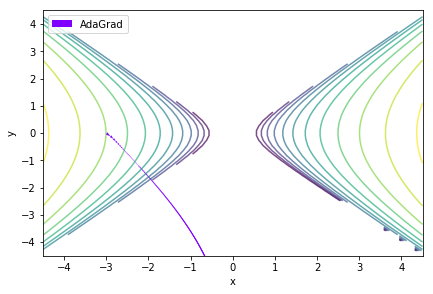

In [279]:
plot_contour(agrad_sopt.saved_vals, fxn_name='saddle', animate_gif=False, fig_size='small')

### 7. AdaDelta

In [280]:
adelta_sopt = AdaDelta(saddle_fxn)
adelta_sopt.run_optimizer(x_start, y_start,  niter = 501, print_after=100, alpha=0.1)

iteration: 0  x: -2.999553 y: -0.010447 dx: -6.0 dy: 0.02
iteration: 100  x: -2.950145 y: -0.360677 dx: -5.901324 dy: 0.700334
iteration: 200  x: -2.896524 y: -4.828371 dx: -5.794157 dy: 9.43676
iteration: 300  x: -2.839426 y: -39.246018 dx: -5.680026 dy: 77.00046
iteration: 400  x: -2.77925 y: -232.645836 dx: -5.559731 dy: 457.638996
iteration: 500  x: -2.716341 y: -1104.964536 dx: -5.433966 dy: 2177.710251


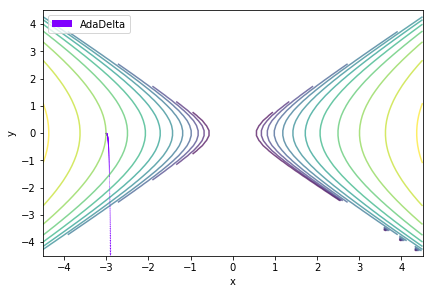

In [281]:
plot_contour(adelta_sopt.saved_vals, fxn_name='saddle', animate_gif=False, fig_size='small')

### 8. NAdam

In [283]:
nadam_sopt = Nadam(saddle_fxn)
nadam_sopt.run_optimizer(x_start, y_start, alpha=0.1, niter = 501, print_after=100)

iteration: 0  x: -2.81 y: -0.2 dx: -6.0 dy: 0.02
iteration: 100  x: -0.01015 y: -14.448367 dx: -0.022426 dy: 28.574185
iteration: 200  x: -3e-06 y: -30.950611 dx: 1e-06 dy: 61.568226
iteration: 300  x: -0.0 y: -47.576652 dx: 0.0 dy: 94.821876
iteration: 400  x: -0.0 y: -64.0619 dx: -0.0 dy: 127.795915
iteration: 500  x: 0.0 y: -80.357031 dx: 0.0 dy: 160.390124


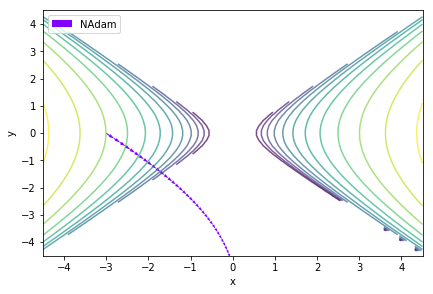

In [284]:
plot_contour(nadam_sopt.saved_vals, fxn_name='saddle', animate_gif=False, fig_size='small')

### 8. RMSprop

In [289]:
rms_sopt = RMSprop(saddle_fxn)
rms_sopt.run_optimizer(x_start, y_start, niter = 501, print_after=100, alpha=0.01)

iteration: 0  x: -2.99 y: -0.02 dx: -6.0 dy: 0.02
iteration: 100  x: -1.99 y: -1.02 dx: -4.0 dy: 2.02
iteration: 200  x: -0.99 y: -2.02 dx: -2.0 dy: 4.02
iteration: 300  x: 4.1e-05 y: -3.02 dx: -0.0 dy: 6.02
iteration: 400  x: 0.003733 y: -4.02 dx: -0.012534 dy: 8.02
iteration: 500  x: 0.003761 y: -5.02 dx: -0.012477 dy: 10.02


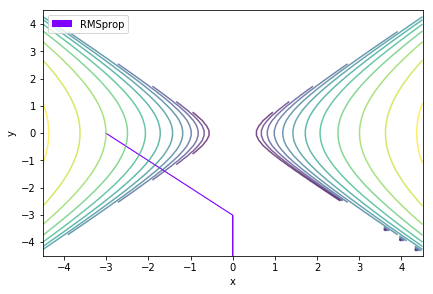

In [290]:
plot_contour(rms_sopt.saved_vals, fxn_name='saddle', animate_gif=False, fig_size='small')

### 9. RAdam

In [293]:
radam_sopt = RAdam(saddle_fxn)
radam_sopt.run_optimizer(x_start, y_start, niter = 501, alpha=0.1, print_after=100)

iteration: 0  x: -2.4 y: -0.012 dx: -6.0 dy: 0.02
iteration: 100  x: -0.038021 y: -2.217789 dx: -0.082075 dy: 4.358256
iteration: 200  x: -0.000236 y: -7.119774 dx: -0.000506 dy: 14.124566
iteration: 300  x: 1e-06 y: -13.525698 dx: 3e-06 dy: 26.911713
iteration: 400  x: -0.0 y: -21.000364 dx: -0.0 dy: 41.842365
iteration: 500  x: 0.0 y: -29.30873 dx: -0.0 dy: 58.444147


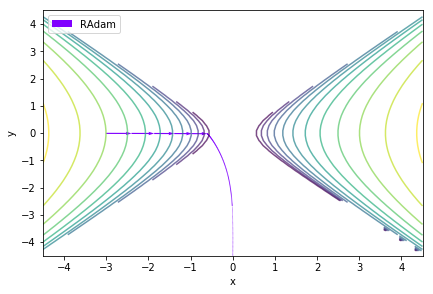

In [294]:
plot_contour(radam_sopt.saved_vals, fxn_name='saddle', animate_gif=False, fig_size='small')

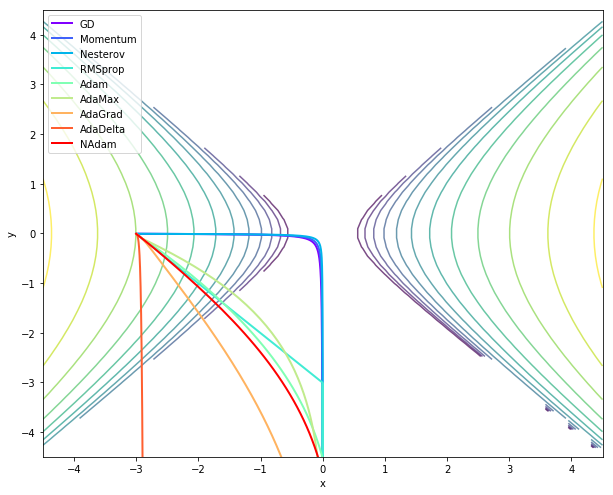

In [295]:
plot_contour(sgd_sopt.saved_vals, sgdmom_sopt.saved_vals, nest_sopt.saved_vals, rms_sopt.saved_vals, 
             adam_sopt.saved_vals, admax_sopt.saved_vals, agrad_sopt.saved_vals, adelta_sopt.saved_vals, 
             nadam_sopt.saved_vals, fxn_name='saddle', f_name='all')

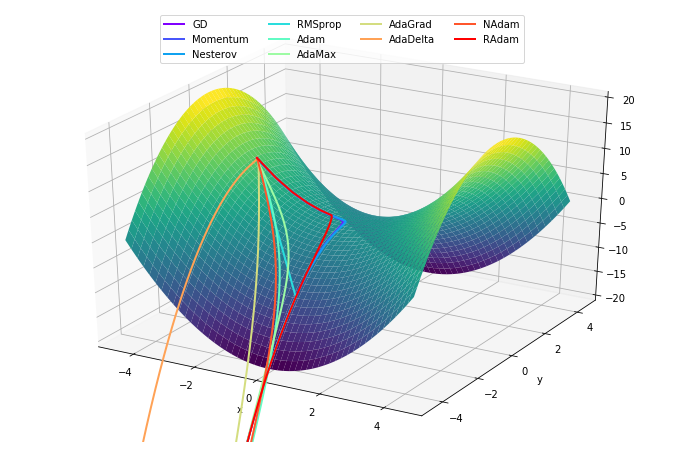

In [296]:
plot_3D(sgd_sopt.saved_vals, sgdmom_sopt.saved_vals, nest_sopt.saved_vals, rms_sopt.saved_vals, 
             adam_sopt.saved_vals, admax_sopt.saved_vals, agrad_sopt.saved_vals, adelta_sopt.saved_vals, 
             nadam_sopt.saved_vals, radam_sopt.saved_vals, fxn_name='saddle', f_name='all')

## Extra

In [1634]:
def lr_tester(lr_list, fxn_n, o_obj, x_s, y_s):
    d_dict = {}
    for num, lr in enumerate(lr_list):
        x_val, y_val = o_obj.run_optimizer(x_s, y_s, niter = 10000, print_after=1e6, alpha=lr, return_var = True)
        d_dict[num] = {'x':x_val, 'y':y_val, 'lr':lr}
    plot_contour(d_dict, fxn_name=fxn_n, animate_gif=False, fig_size='small', in_type='sdict')                             

In [1059]:
def calc_euclidean(vals, b):
    a = np.vstack((vals['x'], vals['y'], vals['z'])).T
#     b = np.array([[3.0], [0.5], [0.0]])
#     dist = distance.cdist(a, b.T, 'euclidean')
    dist = np.sqrt((vals['x']-3.0)**2 + (vals['y']-0.5)**2)
    return dist


def plot_err(vals, plt_name=None):
    x = np.arange(len(vals['x']))
    y = np.absolute(vals['z'])    
    print(y)
    plt.plot(x, y)
    plt.legend('ABCDEF', ncol=2, loc='upper left');
    
def plot_distance(vals, fxn_optimum):
    x = np.arange(len(vals['x']))
    y = calc_euclidean(vals, fxn_optimum)
    print(y)
    plt.figure(figsize=(15,5))
#     plt.ylim(-0.5,3)
    plt.xlim(-10,1500)
    plt.plot(x, y)
    plt.legend('ABCDEF', ncol=2, loc='upper left');